<a href="https://colab.research.google.com/github/miruna-morarasu/AI-Labs/blob/master/KI_Lab4_G12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random

`doIntersect()` - primeste 4 puncte si returneaza:
*   `True`, daca cele doua segmente formate de acestea se intersecteaza
*   `False`, altfel

In [0]:
class Point: 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 

def onSegment(p, q, r): 
    if ( (q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and 
           (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))): 
        return True
    return False
  
def orientation(p, q, r): 
    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y)) 
    if (val > 0): 
        return 1
    elif (val < 0): 
        return 2
    else: 
        return 0
def doIntersect(p1,q1,p2,q2): 
    p1=Point(p1[0],p1[1])
    q1=Point(q1[0],q1[1])
    p2=Point(p2[0],p2[1])
    q2=Point(q2[0],q2[1])
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
    if ((o1 != o2) and (o3 != o4)): 
        return True
    if ((o1 == 0) and onSegment(p1, p2, q1)): 
        return True
    if ((o2 == 0) and onSegment(p1, q2, q1)): 
        return True
    if ((o3 == 0) and onSegment(p2, p1, q2)): 
        return True
    if ((o4 == 0) and onSegment(p2, q1, q2)): 
        return True
    return False 

![sample](https://www.scs.ubbcluj.ro/~mmig0255/Map.png)

(Harta generata in functia `generate_matrix()` descrie coordonatele punctelor din imagine)


In [0]:
def generate_matrix():
  vertices=[(97,197),(97,149),(255,149),(255,197),#0-3
            (143,123),(90,111),(81,60),(138,10),(174,58),#4-8
            (177,127),(220,127),(196,49),#9-11
            (222,75),(222,12),(261,7),(289,36),#12-15
            (279,174),(263,104),(310,142),#16-18
            (299,115),(310,14),(365,14),(363,116),#19-22
            (338,182),(338,145),(371,123),(400,145),(400,186),(367,201),#23-28
            (408,130),(374,27),(387,12),(416,30)]#29-32
  adj_list=[[1,3],[0,2],[1,3],[0,2],
            [5,8],[4,6],[5,7],[6,8],[4,7],
            [10,11],[9,11],[9,10],
            [13,15],[12,14],[13,15],[12,14],
            [17,18],[16,18],[16,17],
            [20,22],[19,21],[20,22],[19,21],
            [24,28],[23,25],[24,26],[25,27],[26,28],[23,27],
            [30,32],[29,31],[30,32],[31,29]]
  shapes=[[0,1,2,3],[4,5,6,7,8],[9,10,11],[12,13,14,15],[16,17,18],[19,20,21,22],[23,24,25,26,27,28],[29,30,31,32]]
  return vertices,adj_list,shapes   

`can_see()` - returneaza o lista de varfuri vizibile dintr-un anumit punct `p1`, in contextul actual

In [0]:
def can_see(p1, vertices, adj_list, shapes):
    to_return = [adj_list[vertices.index(p1)][0], adj_list[vertices.index(p1)][1]]
    p_shape = [x for x in shapes if vertices.index(p1) in x]
    for i in range(len(vertices)):
        ok = True
        if i not in p_shape[0]:
            for j in range(len(adj_list)):
                for k in range(len(adj_list[j])):
                    if j not in [vertices.index(p1), i] and adj_list[j][k] not in [vertices.index(p1), i] and doIntersect(p1, vertices[i], vertices[j], vertices[adj_list[j][k]]):
                        ok = False
            if ok == True:
                to_return.append(i)
                
    return to_return


Parte dintr-o solutie initiala la care am renuntat:

In [0]:
n = 100

def bfs(mat):
    q = []
    order = []
    q.append(0)
    viz = [0] * n
    viz[0] = 1
    while len(q) != 0:
        order.append(q[0])
        for i in range(n):
            if mat[q[0]][i]==1 and viz[i]!=1:
                q.append(i)
                viz[i] = 1
        q.pop(0)
    return order

def Farbung2(mat): 
    color= []
    for i in range(n):
        color.append(n)
    order = bfs(mat) 
    for i in range(n):
        order.append(i)

    color[n-1] = 0
    for i in range(n-2,-1,-1):
        node = order[i]
        color[node] = node

        c=set([])
        for j in range (i,n):
            if a[node][order[j]] == 1:
                neighbour = order[j]
                c.add(color[neighbour])

        mini = 0
        while mini in c:
            mini+=1
        color[node]=mini;
    return color;


Incercare de Fehlerbehandlung (a nu se rula):

In [0]:
import math
import functools

def distance(p1,p2):
  return math.sqrt ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position

def super_nova(vertices, adj_list, shapes, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""
    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    score=0
    # Initialize both open and closed list
    open_list = []
    closed_list = []
    # Add the start node
    open_list.append(start_node)
    # Loop until you find the end
    index=0
    while len(open_list) > 0:
        index+=1
        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        # Found the goal
        #print(current_node.position)
        if current_node == end_node or index > 1000:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            sum=0
            for i in range(len(path)-1):
              sum+=distance(path[i],path[i+1])
            if index>1000:
              index=0
              walkable=can_see(current_node.position,vertices, adj_list, shapes)
              walkable=[vertices[x] for x in walkable]
              current_node=Node(current_node,walkable[random.randint(0,len(walkable)-1)])
              if current_node in closed_list:
                closed_list.pop(closed_list.index(current_node))
              if current_node not in open_list:
                open_list.append(current_node)

              print("I was here :'(")
            else:
              return 1000-sum,path[::-1] # Return reversed path
        # Generate children
        children = []
        walkable=can_see(current_node.position,vertices, adj_list, shapes)
        walkable=[vertices[x] for x in walkable]
        for new_position in walkable: # Adjacent squares
            # Get node position
            node_position = (new_position[0],new_position[1])
            # Create new node
            new_node = Node(current_node, node_position)
            # Append
            children.append(new_node)
        # Loop through children
        for child in children:
            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue
            # Create the f, g, and h values
            child.g = current_node.g + (distance(current_node.position,child.position))
            child.h = (math.sqrt((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2))
            child.f = child.g + child.h
            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue
            # Add the child to the open list
            open_list.append(child)

`a_star_is_born()` - A* Algorithmus

In [0]:
import math
import functools

# Distanta euclidiana
def distance(p1,p2):
  return math.sqrt ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self, other):
        return self.position == other.position

def a_star_is_born(vertices, adj_list, shapes, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""
    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0
    score=0
    # Initialize both open and closed list
    open_list = []
    closed_list = []
    # Add the start node
    open_list.append(start_node)
    # Loop until you find the end
    index=0
    while len(open_list) > 0:
        index+=1
        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        # Found the goal
        #print(current_node.position)
        if current_node == end_node or index > 1000:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            sum=0
            for i in range(len(path)-1):
              sum+=distance(path[i],path[i+1])
            if index>1000:
              return sum-1000,path[::-1]
            return 1000-sum,path[::-1] # Return reversed path
        # Generate children
        children = []
        walkable=can_see(current_node.position,vertices, adj_list, shapes)
        walkable=[vertices[x] for x in walkable]
        for new_position in walkable: # Adjacent squares
            # Get node position
            node_position = (new_position[0],new_position[1])
            # Create new node
            new_node = Node(current_node, node_position)
            children.append(new_node)
        # Loop through children
        for child in children:
            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue
            # Create the f, g, and h values
            child.g = current_node.g + (distance(current_node.position,child.position))
            child.h = (math.sqrt((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2))
            child.f = child.g + child.h
            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue
            # Add the child to the open list
            open_list.append(child)

Statistica a rezultatelor aplicarii algoritmului A* (100 repetitii):

783.0267012681672
-685.4040040737061
930.9348134006719
760.9753124041814
807.615233946934
-685.4040040737061
793.4454827816179
809.6500730274802
767.9755631139824
882.16452148525
726.1317270950026
680.1312786909045
927.1989011071948
797.6273570510659
680.1312786909045
675.0844711122346
701.7754012549703
887.8059385800234
834.3949439196688
869.6264355866409
730.586941799976
930.1072249799738
590.3981980984079
-771.764381064833
704.406395497465
947.1606207455084
847.9265226884269
640.9099960679506
709.5731188704954
709.7205001912738
-538.0495485679214
623.8660831384752
890.834987289883
-447.2450169818319
657.9611663460983
-684.802199308629
961.7116205618468
866.829246001227
-610.0188594935912
798.588540973836
664.2070988583824
815.1334195365462
868.4240017859786
757.6554684641618
891.5334152837843
-797.1255687121334
873.9008326752314
-639.2390441640025
961.3606418272767
-694.6128763478306
698.2728389946965
624.7536999156125
772.7307336206649
789.9624022272392
935.992187976779
841.1491170

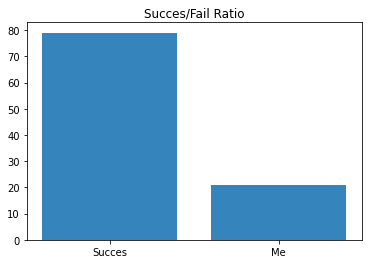

In [0]:
import matplotlib.pyplot as plt
import numpy as np

vertices,adj_list,shapes=generate_matrix()

score=0
succ=0
for i in range(100):
  stop=random.randint(0,len(vertices)-1)
  start=random.randint(0,len(vertices)-1)
  while start==stop:
    start=random.randint(0,len(vertices)-1)
  score_step,path = a_star_is_born(vertices, adj_list, shapes, vertices[start], vertices[stop])
  if score_step>0:
    succ+=1
  score+=score_step
  print(score_step)
print("\nScor total:", score)
print("Numar succese:", succ)

objects = ('Succes','Me')
y_pos = np.arange(len(objects))
performance = [succ,100-succ]
plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.title('Succes/Fail Ratio')
plt.show()